In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('share.csv')
data.head()

,,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46.0,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0.0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73.0,194.7,5,0,0.0,0.0,0.0
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [5]:
X = data['Lower 95% Confidence Interval for Death Rate'].values
Y = data['Age-Adjusted Death Rate'].values
print("X = ", X)
print("Y = ", Y)

X =  [ 45.9 108.9 100.2 ...   0.    0.    0. ]
Y =  [ 46.  125.6 125.3 ...   0.    0.    0. ]


In [8]:
n = len(X)
print("Size of dataset", n)

Size of dataset 3141


In [9]:
meanX = np.mean(X)
meanY = np.mean(Y)
print("Mean of X ",meanX)
print("Mean of Y ",meanY)


Mean of X  38.32626552053486
Mean of Y  47.63126392868513


In [16]:
num = 0
den = 0
for i in range (n):
    num += (X[i] - meanX) * (Y[i] - meanY)
    den += (X[i] - meanX) ** 2
m = num / den
c = meanY - (m * meanX)
print("Slope m = ",m)
print("Constant c = ",c)

Slope m =  1.154074535778231
Constant c =  3.3998968399606397


In [22]:
max_X = np.max(X) + 100
min_X = np.min(X) - 100

print("Max of X", max_X)
print("Min of X", min_X)

x = np.linspace(min_X,max_X,1000)
y = m * x + c



Max of X 208.9
Min of X -100.0


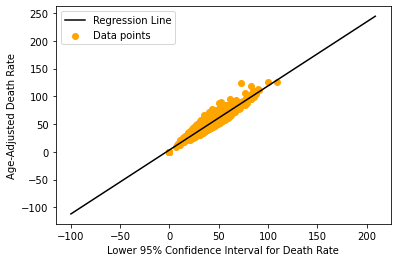

In [26]:
plt.plot(x,y,c='black',label='Regression Line')
plt.scatter(X,Y, c='orange', label='Data points')
plt.xlabel('Lower 95% Confidence Interval for Death Rate')
plt.ylabel('Age-Adjusted Death Rate')
plt.legend()
plt.show()


In [27]:
rsme = 0
for i in range (n):
    y_pred = (m * X[i]) + c
    rsme += (Y[i] - y_pred)
rsme = np.sqrt(rsme/n)
print("Root squre mean error ",rsme)
s

Root squre mean error  5.168756612557419e-08
